# Competição *Kaggle* - *Titanic*

O *RMS Titanic*, com certeza, é um dos navios mais conhecidos da história, principalmente por conta do filme que leva o seu nome. O filme *Titanic* é um dos maiores vencedores de *oscars* com 11 estatuetas douradas (empatado com *BenHur* - 1959- e *O Senhor dos Anéis -  O Retorno do Rei* - 2003). O filme, sucesso de bilheteria e crítica, mescla a história real com a ficção e chegou a ter uma continuação (**que, de modo algum, recomenda-se assistir**).

A proprietária e operadora do *RMS Titanic* era a *White Star flag NEW* e foi produzido na Irlanda com um custo de 1.35 milhões de Libras esterlinas (140 milhões em 2016, valores atualizados). A data de encomenda foi em 17 de setembro de 1908, batimento de quilha (cerimônia que marca o início da construção de um navio) em 31 de março de 1909 e o seu lançamento em 31 de maio de 1911. A data da viagem inaugural foi em 10 de abril de 1912 (5 dias antes da tragédia) e iria fazer a rota do Porto de *Southampton* até Nova Iorque.

O *Titanic* um navio do tipo Transatlântico, ou seja, era um navio projetado para viagens de um porto para outro porto em longas viagens e que, em sua maioria, transportavam passageiros. A classe do *RMS Titanic* era a *Olympic*, que consistia em três transatlânticos britânicos da *White Star Line*; os outros eram o *RMS Olympic* e o *HMHS Britannic*. Essas embarcações eram foram construídas para serem as maiores e mais luxuosas de sua época.

Infelizmente o *RMS Titatnic* partiu para a sua única viagem (com uma Tripulação de 892 pessoas e 2435 passageiros) e teve seu fim em 15 de abril e 1912, quando chocou-se com um *iceberg* que rompeu o casco da embarcação; a vida de centenas de pessoas foram perdidas, não só por conta do acidente, mas outra série de erros de ordem técnica. Por exemplo: deveriam haver 20 botes salva-vidas no navio que poderiam ter salvado a vida de 1178 pessoas, mas para manter a beleza do navio esse número foi reduzido pelo proprietário do navio; e a inexperiência da tripulação. 

Outros desastres ocorreram após a tragédia que ocorreu com o *RMS Titanic*, como:

1) *Lusitania* naufraga após ser atingido por um torpedo (1915);

2) O espanhol *Príncipe de Austúrias* naufraga na costa brasileira ao colidir com rochedos na Ponta do Boi, Ilhabela, litoral de São Paulo (1916);

3) naufrágio do *HMHS Britannic* na Grécia (1916);

4) naufrágio do *SS Cap Arcona* (1945);

5) e o italiano *SS Andrea Doria* naufraga após colidir com o *SS Stockholm* (1956).

O objetivo dessa competição é usar algum(ns) modelo(s) de *Machine Learning* do tipo classificação e prever se um grupos de passageiros irá ou não sobreviver ao naufrágio do *RMS Titanic*.

## Dados

Foram disponibilizados dois conjunto de dados: *train.csv* (treino) e *test.csv* (teste).

O *train.csv* será usado para treinar o modelo e o *test.csv* para gerar as previsões.

Com exceção de Survived, ambos os conjuntos de dados possuem os mesmos nomes de variáveis, que são:

**1)** *Survived* (Ou Sobrevivência): que está preenchido com 1 (sobreviveu) ou 0 (não sobreviveu);

**2)** *Pclass* (ou Classe de ingresso): que está preenchido com 1 (1ª classe),2 (2ª classe) ou 3 (3ª classe);

**3)** *Sex* (ou Sexo): male (masculino) e female (feminino);

**4)** *Age* (ou idade): idade dos passageiros;

**5)** *Sibsp*: Nº de irmãos / cônjuges a bordo do Titanic;

**6)** *Parch*: Nº de pais / filhos a bordo do Titanic;

**7)** *Ticket*: Número do bilhete;

**8)** *Fare*: Valor da tarifa de embarque;

**9)** *Cabin*: Cabine dos passageiros;

**10)** *Embarked*: de que porto o passageiro embarcou no Titanic (C = Cherbourg, Q = Queenstown, S = Southampton).

Os dados podem ser obtidos [aqui](https://www.kaggle.com/c/titanic/data)

## Importação das bibliotecas

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from catboost import CatBoostClassifier
from sklearn.linear_model import Perceptron
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn_rvm import EMRVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as ltb
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression

## Importação dos dados

In [106]:
train=pd.read_csv('train_tit.csv')
test=pd.read_csv('test_tit.csv')

## Análise exploratória e Tratamento do dados

Visualizando as bases de dados de treino

In [107]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Visualizando a base de dados de teste.

In [108]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Visualizando as colunas, pois há casos em que as bases não possuem o mesmo número de colunas.

In [109]:
train.columns.values, test.columns.values

(array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object),
 array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object))

Aqui podemos vos tipos de dados de cada colunas dos *datasets* de treino e de teste.

As variáveis numéricas são *PassengerId*,*Survived*, *Pclass*,*Age*,*Sibsp*,*Parch* e *Fare*.

Variáveis não numéricas: *Name*, *Sex*, *Ticket* e *Cabin*.

Teremos que transformar as variáveis não numéricas em numéricas para podermos usá-las nos modelos de *Machine Learning*.

In [110]:
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

Estastísticas descritivas de cada coluna do *dataset* de treino.

In [111]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Estatísticas descritivas do *dataset* de teste.

In [112]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


#### Visualização dos valores faltantes nas bases de treino e teste

Podemos ver que na base de treino há valores faltantes na coluna *Age*, *Cabin* e *Embarked* e na base de teste, nas colunas *Age* e *Cabin*. Na coluna Cabin possui muitos valores faltantes em ambas as colunas, por esse motivo essa coluna será excluída.

Na coluna *Age* iremos fazer um processo de imputação, onde substituiremos os valores faltantes pela média da coluna idade. Na coluna *Embarked*, também faremos um processo de imputação, mas substituiremos os valores faltantes pelos valores mais frequentes, ou seja, a moda.

In [113]:
train.isna().sum() ,test.isna().sum()

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64, PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64)

## Análise e tratamento da coluna *Pclass*

Primeiro vamos ver o número de passageiros por classe: **A grande maioria são da terceira classe**.

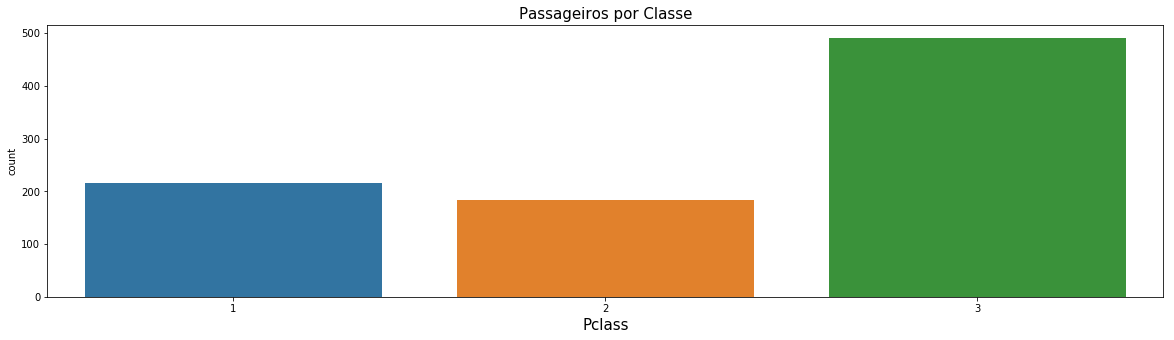

In [114]:
plt.figure(figsize=(20,5))
plt.title('Passageiros por Classe',size=15)
plt.xlabel('Sexo',size=15)
plt.ylabel('')
sns.countplot(train['Pclass']);

Aqui podemos um percentual de sobreviventes por classe (1 - primeira classe, 2 -segunda classe, 3-terceira classe):

Da classe 1, em média, aproximadamente 63% sobreviveram;

Da classe 2, em média, aproximadamente 47% sobreviveram;

Da classe 3, em média, aproximadamente 24% sobreviveram.

Em outras palavras, a medida que o *nível* da classe cai (da mais rica para a mais pobre) a taxa de sobreviência vai caindo.

In [115]:
train[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Aqui podemos ver visualmente a informação acima.

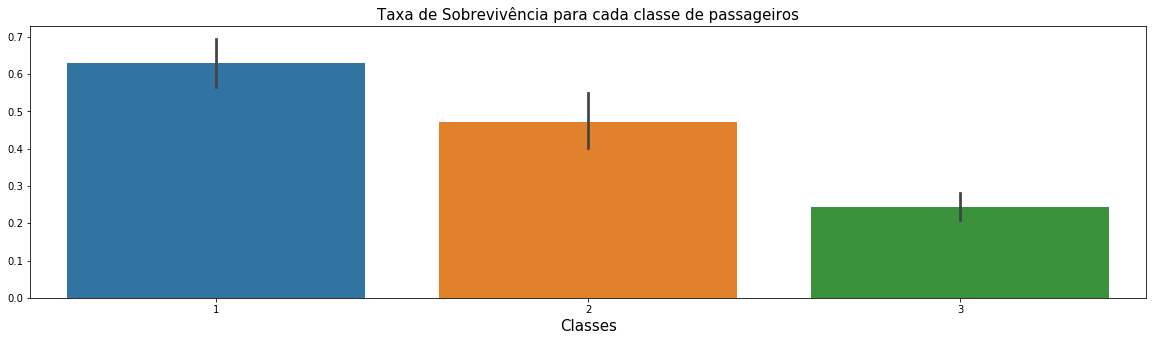

In [116]:
plt.figure(figsize=(20,5))
plt.title('Taxa de Sobrevivência para cada classe de passageiros',size=15)
sns.barplot(x="Pclass", y="Survived", data=train)
plt.xlabel('Classes',size=15)
plt.ylabel('');

Aqui vamos separar entre não sobreviventes (0) e sobreviventes (1).

Percebemos que entre os que não sobreviveram, a terceira classe foi, disparadamente, a de maior taxa.

<Figure size 1440x360 with 0 Axes>

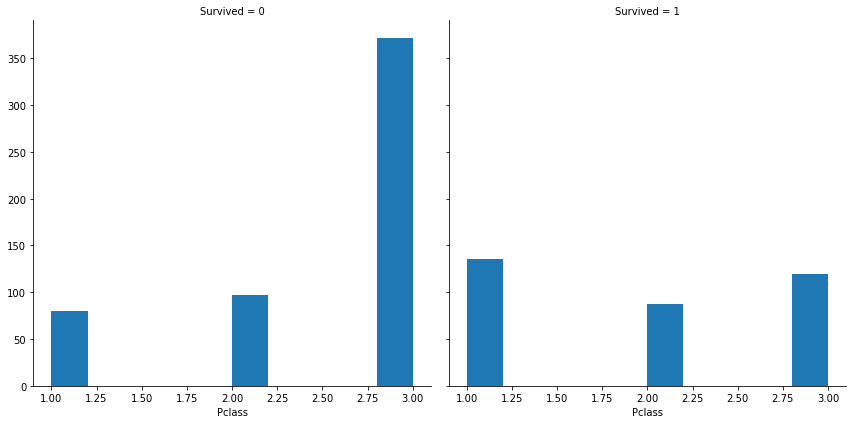

In [117]:
plt.figure(figsize=(20,5))
g = sns.FacetGrid(train, col='Survived',height=6)
g.map(plt.hist, 'Pclass',bins=10);

A coluna *Pclass* não tem nenhum valor faltante, por esse motivo não iremos fazer nenhum processo de imputação e como seus valores são númericos não precisaremos transformá-los.


## Análise e tratamento da coluna *Sex*

A coluna *Sex* está no formato objeto, então irei substituir o que está em string por números: *female* será substituído por 0 e *male* será substituído por 1.

In [118]:
train['Sex'].replace("female",0,inplace=True)
train['Sex'].replace("male",1,inplace=True)

Podemos ver que temos mais homens do que mulheres nessa coluna.

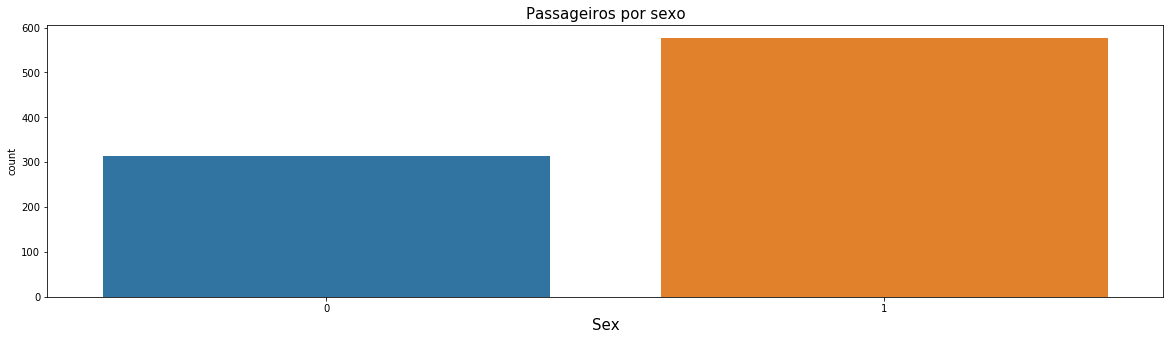

In [119]:
plt.figure(figsize=(20,5))
plt.title('Passageiros por sexo',size=15)
plt.xlabel('Sexo',size=15)
plt.ylabel('')
sns.countplot(train['Sex']);

Entre as mulheres a sobrevivência foi maior que dos homens, pois quase 3/4 das mulheres sobreviveram enquanto menos de 1/5 dos homens sobreviveram.

Provavelmente por conta de regra "Mulheres e crianças primeiro" que é um código de conduta datado de 1852, pelo qual as vidas de mulheres e crianças deveriam ser salvas primeiro em uma situação que ameaça a vida, geralmente abandonando o navio, quando os recursos de sobrevivência, como botes salva-vidas são limitados.

In [120]:
train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,0,0.742038
1,1,0.188908


De forma gráfica.

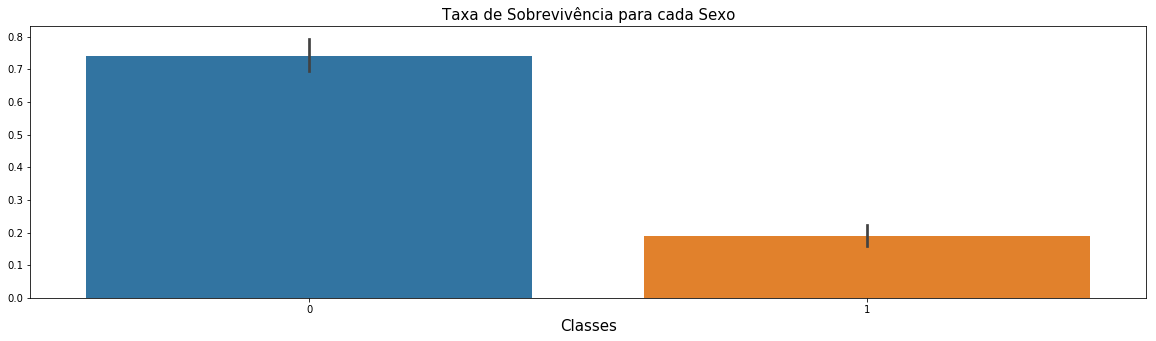

In [121]:
plt.figure(figsize=(20,5))
plt.title('Taxa de Sobrevivência para cada Sexo',size=15)
sns.barplot(x="Sex", y="Survived", data=train)
plt.xlabel('Classes',size=15)
plt.ylabel('');

Podemos verificar como fica isso por sexo e por classe de passageiros.

Então vemos que para o sexo feminino as maiores taxa de sobrevivência são da primeira e segunda classe, e para o sexo masculino a maior taxa de sobrevivência é da primeira classe. 

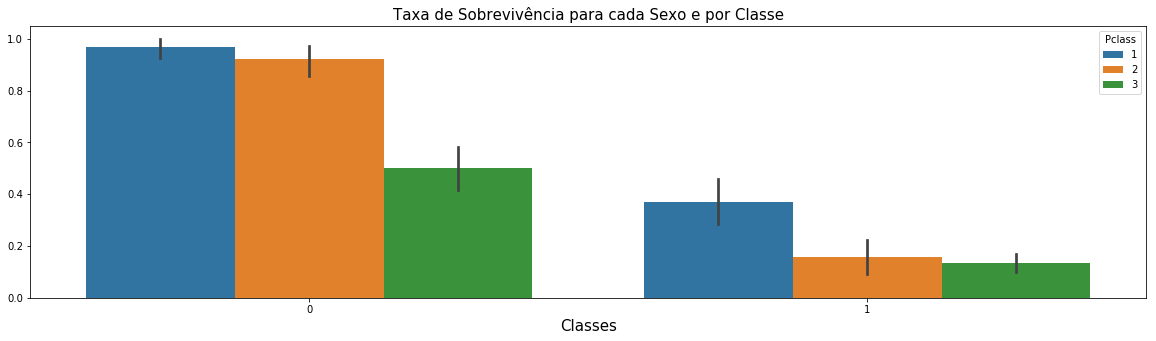

In [122]:
plt.figure(figsize=(20,5))
plt.title('Taxa de Sobrevivência para cada Sexo e por Classe',size=15)
sns.barplot(x="Sex", y="Survived", data=train,hue='Pclass')
plt.xlabel('Classes',size=15)
plt.ylabel('');

Aqui, segregando ainda mais, podemos ver que, entre os não sobreviventes o número é majortariamente de homens.

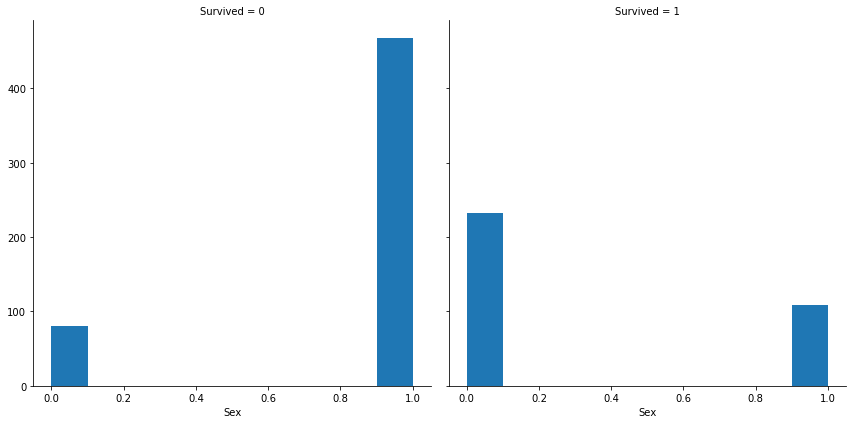

In [123]:
h = sns.FacetGrid(train, col='Survived',height=6)
h.map(plt.hist, 'Sex',bins=10)

Faremos o mesmo procedimento de substituição para o *dataset* de teste.

In [124]:
test['Sex'].replace("female",0,inplace=True)
test['Sex'].replace("male",1,inplace=True)

## Análise tratamento da coluna *Embarked*

Agora vamos para a *fetaure Embarked* : os códigos *C,Q,S*, referem-se ao porto de embarque de cada tripulante do *RMS Titanic*. **C** refere-se ao porto de *Cherbourg*, **Q** ao porto de *Queenstown* e **S** a *Southampton*.

Vamos substituir esses objetos por valores numéricos

In [125]:
train['Embarked'].replace("C",0,inplace=True)
train['Embarked'].replace("Q",1,inplace=True)
train['Embarked'].replace("S",2,inplace=True)

test['Embarked'].replace("C",0,inplace=True)
test['Embarked'].replace("Q",1,inplace=True)
test['Embarked'].replace("S",2,inplace=True)

A grande maioria dos passageiros embarcaram no porto de *Southampton*.

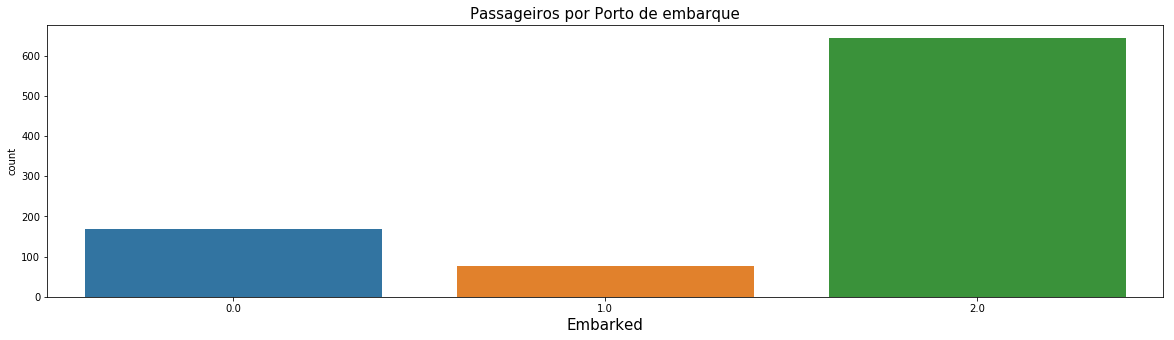

In [126]:
plt.figure(figsize=(20,5))
plt.title('Passageiros por Porto de embarque',size=15)
plt.xlabel('Sexo',size=15)
plt.ylabel('')
sns.countplot(train['Embarked']);

Na tabela abaixo podemos ver que embarques do porto de *Cherbourg* teve uma taxa de sobrevivência de mais de 55%, quem embarcou do porto de *Queenstown*, quase 39% e quem embarcou de *Southampton*, 33%.

In [127]:
train[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,0.0,0.553571
1,1.0,0.389610
2,2.0,0.336957


Graficamente.

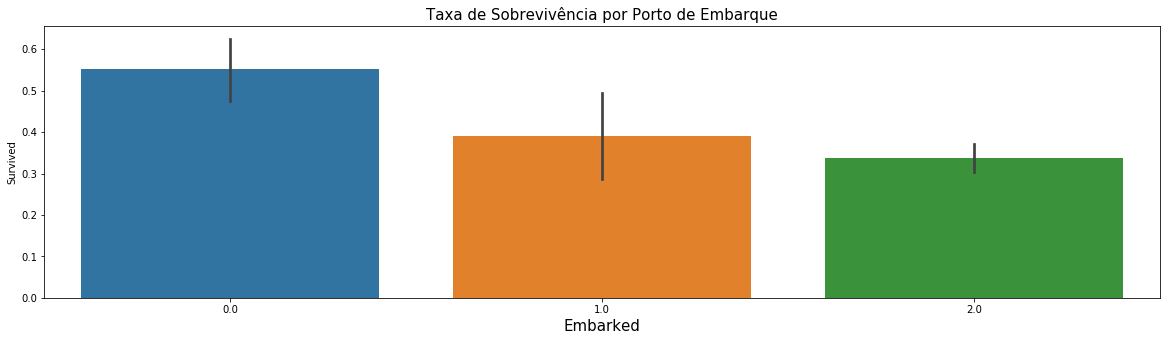

In [128]:
plt.figure(figsize=(20,5))
plt.title('Taxa de Sobrevivência por Porto de Embarque',size=15)
plt.xlabel('Porto de embarque',size=15)
plt.ylabel('')
sns.barplot(x="Embarked", y="Survived", data=train);

Aqui nesses 2 gráficos abaixo podemos ver embarques de *Southampton* teve uma alta taxa de mortes, mas curioso que entre os sobreviventes, também a taxa foi alta. Os portos de *Cherbourg* e *Queenstown* foram as que menos tiveram mortes.

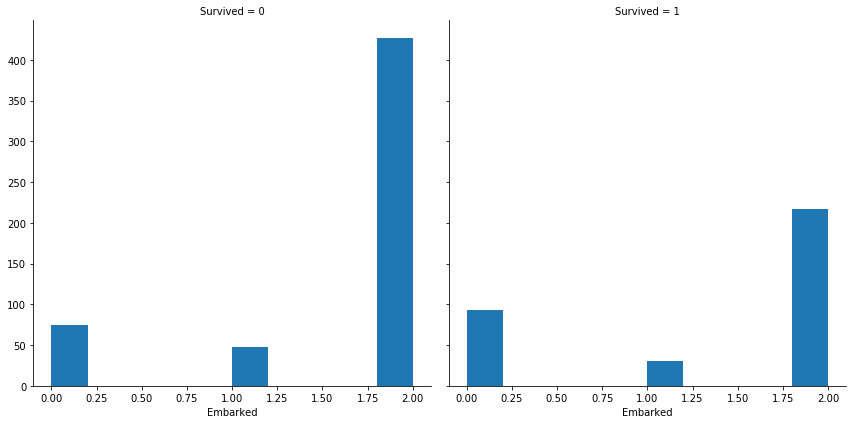

In [129]:
h = sns.FacetGrid(train, col='Survived',height=6)
h.map(plt.hist, 'Embarked',bins=10)

Por qual motivo o porto de *Southampton* teve a maior taxa de não sobrevivência ?

Vamos segregar por classe e ver o motivo: **O porto de *Southampton* foi de onde vieram a maior parte dos passageiros da terceira classe e são esses passageiros os de maiores taxas de mortalidade na tragédia**.

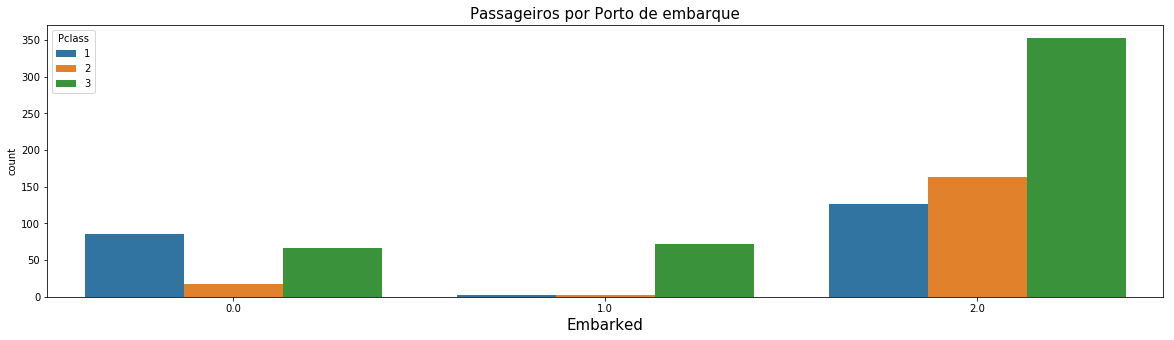

In [130]:
plt.figure(figsize=(20,5))
plt.title('Passageiros por Porto de embarque',size=15)
plt.xlabel('Sexo',size=15)
plt.ylabel('')
sns.countplot(x= 'Embarked', data=train, hue='Pclass');

Tratamento final de *Embarked*: Para *Embarked* substituiremos pela valor que mais se repete (a moda).

In [131]:
train['Embarked'].fillna(train['Embarked'].dropna().mode()[0],inplace=True)

E transformaremos os valores para o tipo inteiro.

In [132]:
train['Embarked']=train['Embarked'].astype(int)

## Análise e tratamento da coluna *SibSp*

A variável *SibSp* que refere-se a número de irmão/conjugês abordo.

A grande maioria dos passageiros não possuíam irmãos ou conjugês ou possuíam pelo menos 1 acompanhante desse tipo.

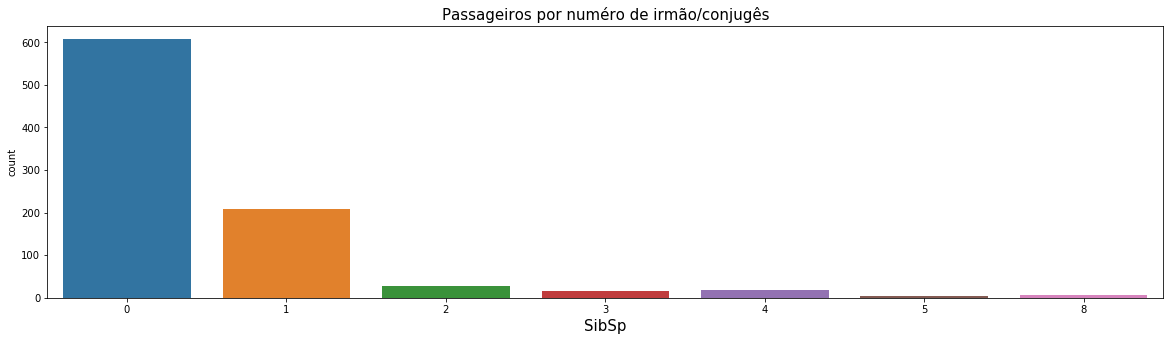

In [133]:
plt.figure(figsize=(20,5))
plt.title('Passageiros por numéro de irmão/conjugês',size=15)
plt.xlabel('Irmão/conjugês',size=15)
plt.ylabel(' ')
sns.countplot(train['SibSp']);

Podemos ver que a sobrevivência foi maior para o qual o número de irmãos/conjugês são menores (1,2,0).

In [134]:
train[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Observando graficamente o resultado anterior, que para 0, 1 e 2 a sobrevivência foi maior.

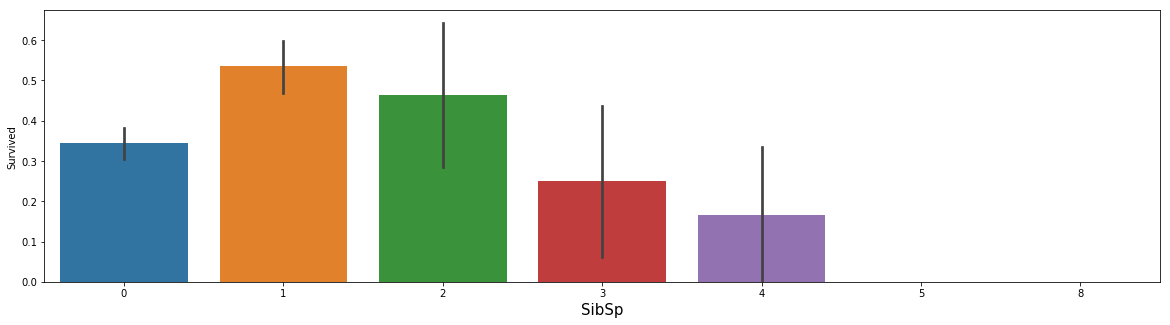

In [135]:
plt.figure(figsize=(20,5))
plt.xlabel('Irmão/Conjugê',size=15)
plt.ylabel(' ')
sns.barplot(x="SibSp", y="Survived", data=train);

## Análise e tratamento de coluna *Parch*

A variável *Parch* trata do número de pais/crianças a bordo e a grande maioria dos passageiros não estavam acompanhados de pais e/ou filhos.

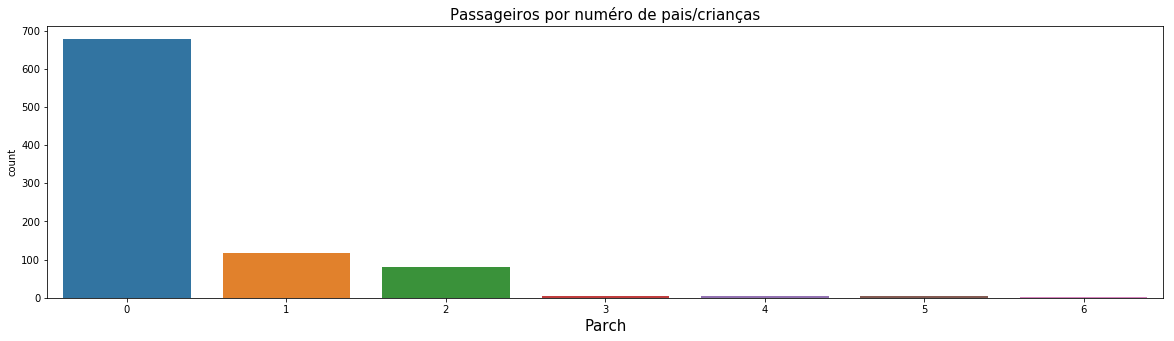

In [136]:
plt.figure(figsize=(20,5))
plt.title('Passageiros por numéro de pais/crianças',size=15)
plt.xlabel('Irmão/conjugês',size=15)
plt.ylabel(' ')
sns.countplot(train['Parch']);

A sobrevivência é maior para números menores dessa variável, acima ou igual a 50% para os valores 1, 2 e 3.

In [137]:
train[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Graficamente, a medida que essa variável vai aumentando a taxa de sobrevivência também aumenta, até o valor 4, em que há uma queda de nível.

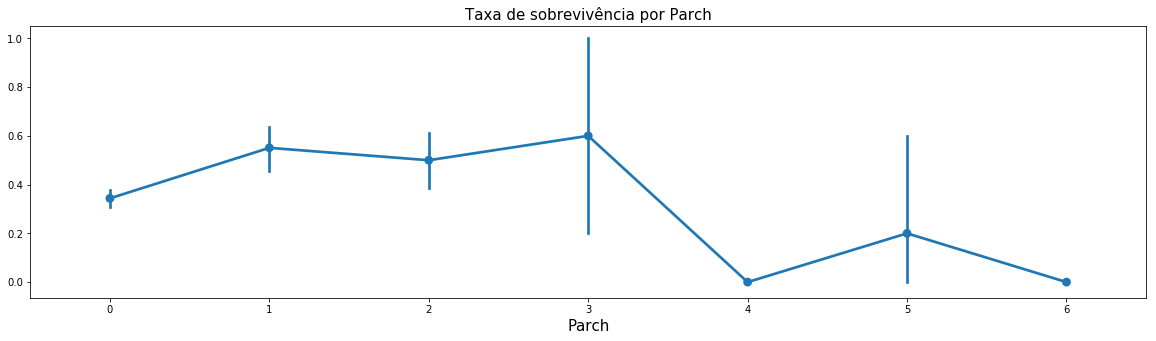

In [138]:
plt.figure(figsize=(20,5))
plt.title('Taxa de sobrevivência por Parch',size=15)
sns.pointplot(x="Parch", y="Survived", data=train)
plt.xlabel('Parch',size=15)
plt.ylabel('');

### Criação das *features* artificiais *Family* e *Alone*.

Tendo em vista que temos o número de pais/crianças e de irmãos/conjûgês, podemos criar uma variável chamada de família (*family*) que será a soma entre *SibSp* e *Parch*. Coloquei +1, pois vai surgir famílias com 0 componentes, que não faz sentido. Faremos isso para as bases de treino e de teste.

In [139]:
train['Family']=train['SibSp']+train['Parch']+1
test['Family']=test['SibSp']+test['Parch']+1

A taxa de sobrevivência é maior para famílias com 3, 2 e 1 componentes.

In [140]:
train[['Family','Survived']].groupby(['Family'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Family,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


Resultado gráfico, a medida que o número de membros aumenta, até certo valor, a sobrevivência também aumenta até 4 componentes, depois disso há uma queda de nível e em seguida a taxa chega a zero.

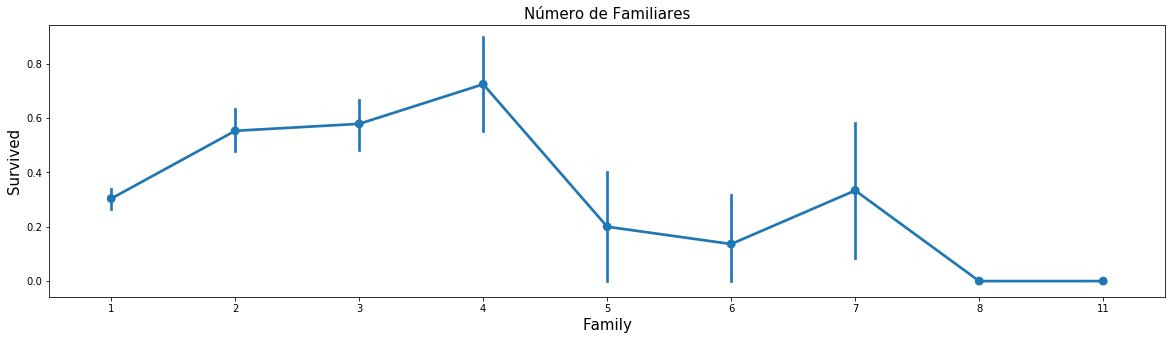

In [141]:
plt.figure(figsize=(20,5))
plt.title('Número de Familiares',size=15)
plt.xlabel("Family",size=15)
plt.ylabel('taxa de sobrevivência',size=15)
sns.pointplot(x="Family", y="Survived", data=train);

Um questionamento que podemos fazer é: será que indivíduos que estão sozinho tem uma taxa de sobrevivência maior ou menor ?

com o *for loop* abaixo irei fazer a seguinte substituição:

Para valor na variável *Family*, se for igual a 1 (ou seja, alguém que embarcou sozinho) ele substituirá o valor por 1, caso contrário ele substiturá por zero (ou seja, não está sozinho) e substituirei *Family* por *Alone* (sozinho).

In [142]:
for i in train['Family']:
    if i==1:
        train['Family'].replace(i,1,inplace=True)
    else:
        train['Family'].replace(i,0,inplace=True)

Farei o mesmo para o *dataset de teste.

In [143]:
for i in test['Family']:
    if i==1:
        test['Family'].replace(i,1,inplace=True)
    else:
        test['Family'].replace(i,0,inplace=True)

Criaremos a variável Alone em ambos os *datasets*.

In [144]:
train['Alone']=train['Family']
test['Alone']=test['Family']

Agora vamos excluir as variáveis que não nos interessam.

Excluiremos *Ticket* por ter muitos valores duplicados, *Cabin* possui muitos valores nulos, *Family* é o mesmo que *Alone* e *PassengerId* não nos traz informações relevantes. Assim sendo,

In [145]:
train=train.drop(['PassengerId','Ticket','Cabin'],axis=1)
test=test.drop(['PassengerId','Ticket','Cabin'],axis=1)

Novo *dataset* de treino.

In [146]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Alone
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,0,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2,0,0
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2,1,1


Novo *dataset* de teste.

In [147]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Alone
0,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,1,1,1
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,2,0,0
2,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,1,1,1
3,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,2,1,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,2,0,0


## Tratamento da coluna *Name* e criação da *feature Title*

Observando *Name*, podemos nos questionar, o que podemos extrair dessa coluna ?

Abaixo podemos ver algo interessante: os nomes possuem títulos (Mr., Miss, Master, Mrs) podemos extrair essa informação e criar uma nova variável.

In [148]:
train['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

Usamos o método *split* com o *apply* e extrairemos esses títulos de cada nome e extraimos o que vem depois da vírgula em *Name* até o ponto final.

In [149]:
train['title']=train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test['title']=test['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

O que são cada um desses títulos ?

1) *Mr* é o título dados a homens;

2) *Miss* é dado a mulheres solteiras;

3) *Mrs* é dado a mulheres casadas;

4) *Master* é dado para meninos e jovens;

5) *Dr* (Doctor ou Doutor) é um título acadêmico;

6) *Rev* (Reverendo) é um título dado a clérigos;

7) *Mlle* (Mademoiselle) é um título francês dado a mulheres solteiras;

8) *Major* é um título militar;

9) *Col* (Coronel) é um título militar;

10) *Sir* é título dado para homens, pela coroa Britânica;

11) *Ms* dados a mulheres quando o estado civil é desconhecido;

12) *Mme* (madame) é dado a mulheres;

13) *the Countess* (condessa) é um título de nobreza;

14) *Jonkheer* é título que denota a classificação mais baixa dentro da nobreza;

15) *Lady* é um título de nobreza;

16) *Capt* (Capitão), refere-se ao capitão do navio;

17) *Don* (Dom) é um título de nobreza.

Podemos ver, abaixo, que os que mais se repetem na base de treino e teste são : *Mr*, *Miss*, *Mrs* e *Master*.

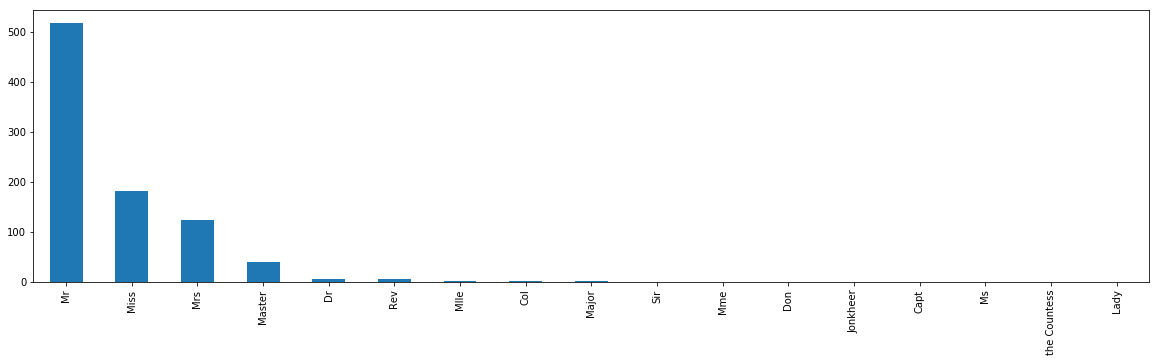

In [150]:
train['title'].value_counts().plot.bar(figsize=(20,5));

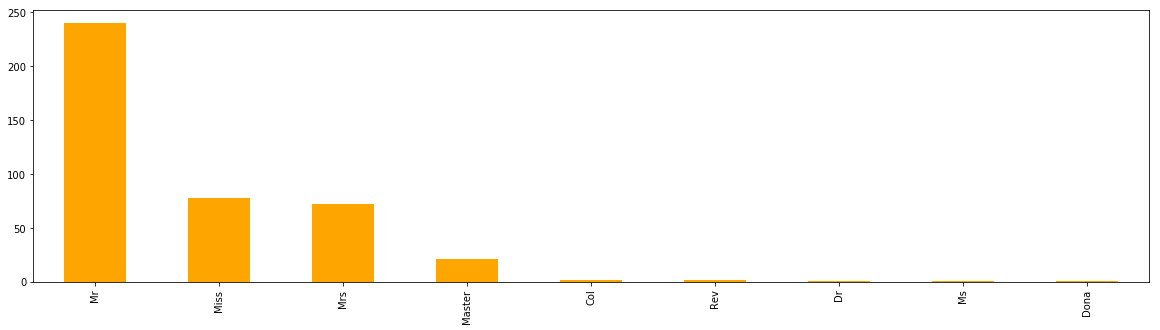

In [151]:
test['title'].value_counts().plot.bar(figsize=(20,5), color='orange');

Vamos então fazer uma conversão:

Vamos agrupar título que se referem a homens, mulheres, mulheres não casadas, crianças e títulos raros e de 17 classes, teremos, apenas, 4 classes apenas.

1) *Mr* ;

2) *Ms , Miss e Mlle*;

3) *Mme e Mrs*;

4) *Master, Dr, Rev, Major, Col, Sir, the Countess, Jonkheer, Lady, Capt, Don e Dona*.

Faremos dois *replaces*, um para substituir os termos apenas um título por classe e outro para substituirmos por valores numéricos; e faremos isso para cada base de treino e teste.

In [152]:
train['title'].replace("Ms","Miss",inplace=True)
train['title'].replace("Mlle","Miss",inplace=True)

train['title'].replace("Mme","Mrs",inplace=True)
train['title'].replace("Master","Rare",inplace=True)
train['title'].replace("Dr","Rare",inplace=True)
train['title'].replace("Rev","Rare",inplace=True)
train['title'].replace("Col","Rare",inplace=True)
train['title'].replace("Major","Rare",inplace=True)
train['title'].replace("Sir","Rare",inplace=True)
train['title'].replace("the Countess","Rare",inplace=True)
train['title'].replace("Jonkheer","Rare",inplace=True)
train['title'].replace("Lady","Rare",inplace=True)
train['title'].replace("Capt","Rare",inplace=True)
train['title'].replace("Don","Rare",inplace=True)

test['title'].replace("Ms","Miss",inplace=True)

test['title'].replace(["Master","Col","Rev","Dona","Dr"],"Rare",inplace=True)

Vemos agora os valores da coluna *Title*.

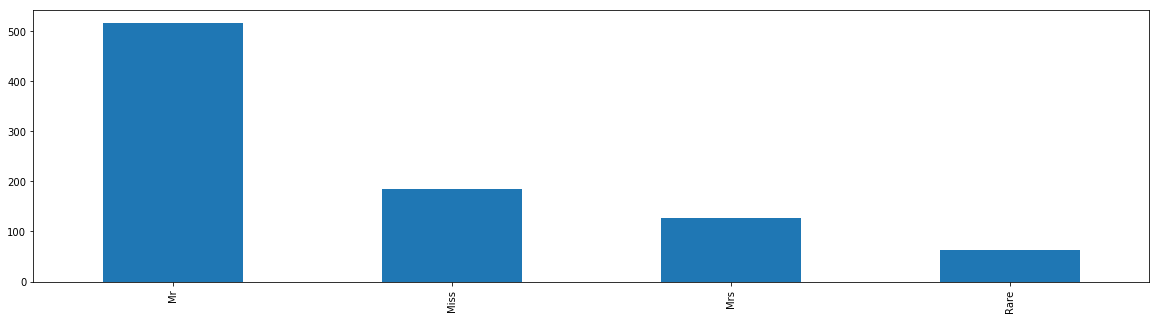

In [153]:
train['title'].value_counts().plot.bar(figsize=(20,5));

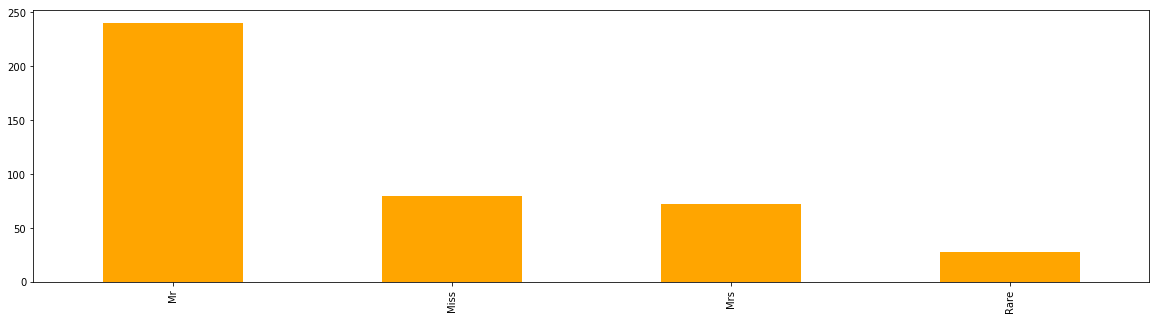

In [154]:
test['title'].value_counts().plot.bar(figsize=(20,5), color='orange');

Agora substituiremos esses Títulos por valores numéricos.

In [155]:
train['title'].replace("Mr",0,inplace=True)
train['title'].replace("Miss",1,inplace=True)
train['title'].replace("Mrs",2,inplace=True)
train['title'].replace("Rare",3,inplace=True)

test['title'].replace("Mr",0,inplace=True)
test['title'].replace("Miss",1,inplace=True)
test['title'].replace("Mrs",2,inplace=True)
test['title'].replace("Rare",3,inplace=True)

Vemos que agora temos variáveis categóricas e numéricas.

In [156]:
print(train['title'].value_counts())
print(''*40)
print(test['title'].value_counts())

0    517
1    185
2    126
3     63
Name: title, dtype: int64

0    240
1     79
2     72
3     27
Name: title, dtype: int64


Aqui podemos ver que mulheres casadas (2), mulheres solteiras (1) e crianças (3), tem taxas de sobrevivência muito maior que a dos homens.

In [157]:
train[['title','Survived']].groupby(['title'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,title,Survived
2,2,0.793651
1,1,0.702703
3,3,0.492063
0,0,0.156673


Graficamente.

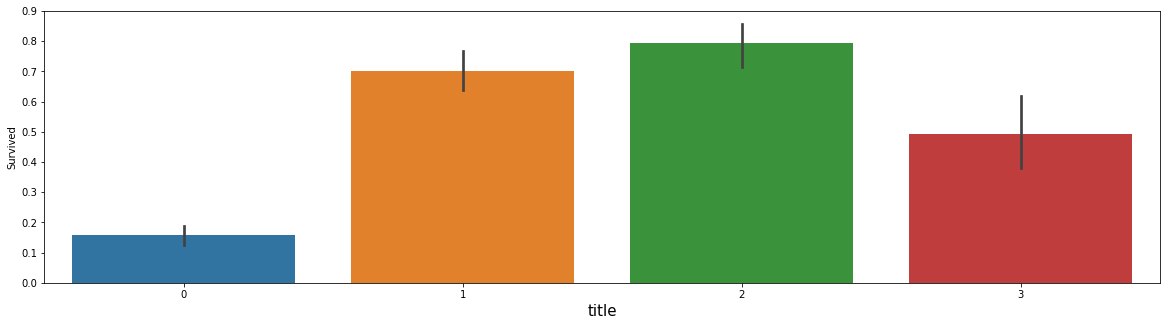

In [158]:
plt.figure(figsize=(20,5))
plt.xlabel("Títulos",size=15)
sns.barplot(x="title", y="Survived", data=train);

Vamos agora excluir a coluna *Name*.

In [159]:
train=train.drop(['Name'],axis=1)
test=test.drop(['Name'],axis=1)

## Tratamento da coluna *Age*

Antes de trabalharmos com essa coluna vamos observar qie ela possui dados faltantes e por isso precisa ser tratada.

In [160]:
train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
Family        0
Alone         0
title         0
dtype: int64

Irei imputar esses dados com a mediana, pois é uma medida de posição que não é influenciada por *outliers*. Em seguida faremos o mesmo para a base de teste.

In [161]:
train['Age'].fillna(train['Age'].median(),inplace=True)
train['Age']=train['Age'].astype(int)

In [162]:
test['Age'].fillna(test['Age'].median(),inplace=True)
test['Age']=test['Age'].astype(int)

Vamos visualizar o histograma dos dados dessa coluna.

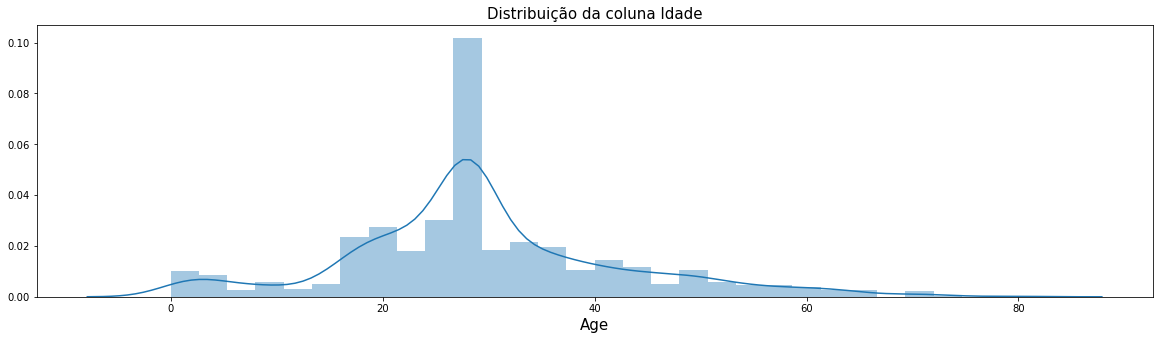

In [163]:
plt.figure(figsize=(20,5))
plt.title('Distribuição da coluna Idade',size=15)
plt.xlabel('Idade',size=15)
sns.distplot(train['Age']);

Vemos que a distribuição das idades pela variável *Survived* são bastante semelhantes.

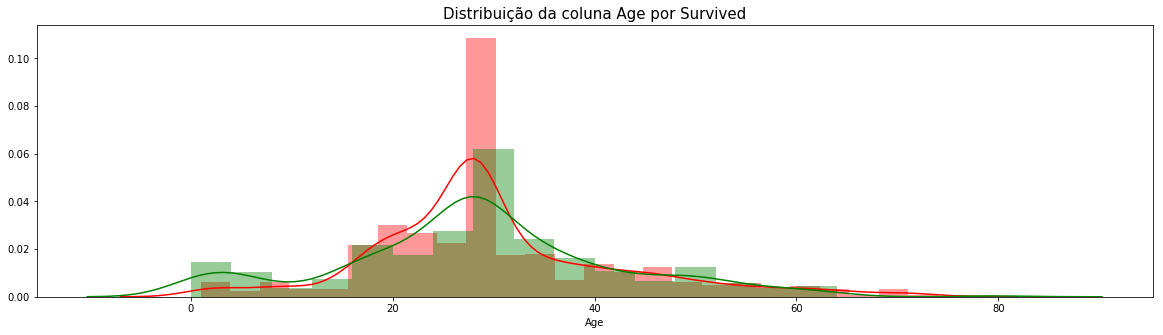

In [164]:
plt.figure(figsize=(20,5))
plt.title('Distribuição da coluna Age por Survived',size=15)
sns.distplot(train['Age'].loc[train['Survived']==0] , color="red")
sns.distplot(train['Age'].loc[train['Survived']==1] , color="green");

Ainda há um problema, do jeito que Age está ainda não está bom para o treino algoritmo, por isso irei fazer o seguinte: transformarei a idade em uma variável categórica.

In [165]:
train['Faixa_age']=pd.cut(train['Age'], 5)
train[['Age','Faixa_age']].head(10)

,Age,Faixa_age
0,22,"(16.0, 32.0]"
1,38,"(32.0, 48.0]"
2,26,"(16.0, 32.0]"
3,35,"(32.0, 48.0]"
4,35,"(32.0, 48.0]"
5,28,"(16.0, 32.0]"
6,54,"(48.0, 64.0]"
7,2,"(-0.08, 16.0]"
8,27,"(16.0, 32.0]"
9,14,"(-0.08, 16.0]"


Vemos que a maior parte dos passageiros possuem a idade entre 16 a 32 anos.

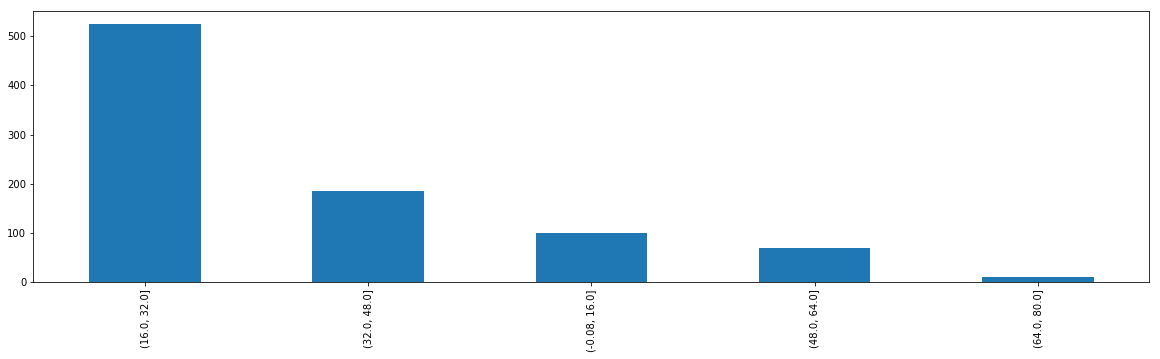

In [166]:
train['Faixa_age'].value_counts(ascending=False).plot.bar(figsize=(20,5));

A taxa de sobrevivência por faixa etária mostra que apenas os menores de 16 anos tiveram uma faixa superior a 50%.

In [167]:
train[['Faixa_age','Survived']].groupby(['Faixa_age'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Faixa_age,Survived
0,"(-0.08, 16.0]",0.550000
3,"(48.0, 64.0]",0.434783
2,"(32.0, 48.0]",0.403226
1,"(16.0, 32.0]",0.344762
4,"(64.0, 80.0]",0.090909


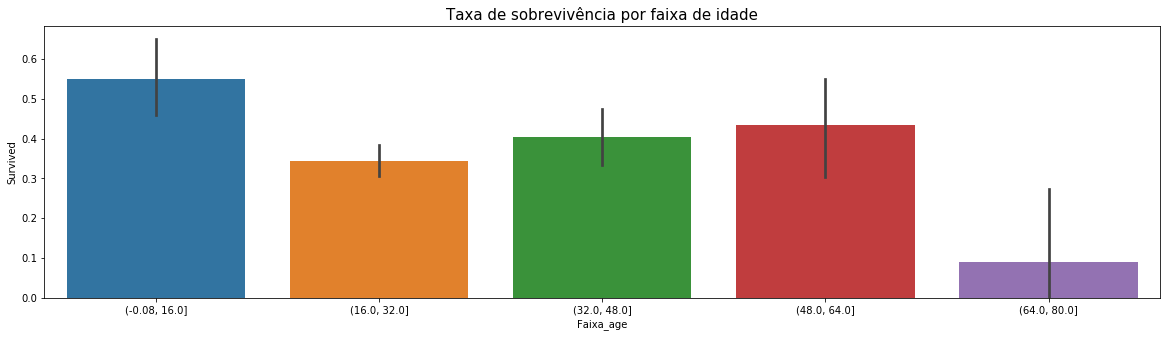

In [168]:
plt.figure(figsize=(20,5))
plt.title("Taxa de sobrevivência por faixa de idade",size=15)
sns.barplot(x="Faixa_age", y="Survived", data=train);

Vamos fazer o mesmo para o dataset teste.

In [169]:
test['Faixa_age']=pd.cut(test['Age'], 5)

Para transformamos a ideade de dado numérico para uma variável categórica numérica iremos, primeiro criar uma lista em que estarão os dados de treino e de teste.

In [170]:
treino_teste=[train,test]

Vamos fazer um *for loop* e nesse *for loop* se o valor da coluna *Age* estiver abaixo de 16, os valores serão substituídos por 0, se os valores entre maiores de 16 e menores iguais 32, serão substituídos por 1; se os valores entre maiores de 32 e menores iguais 48, serão substituídos por 2; se os valores entre maiores de 48 e menores iguais 64, serão substituídos por 3; e se os valores entre maiores que 64, serão substituídos por 4. E esse procedimento será feito para ambos os *datasets*.

In [171]:
for dados in treino_teste:    
    dados.loc[ dados['Age'] <= 16, 'Age'] = 0
    dados.loc[(dados['Age'] > 16) & (dados['Age'] <= 32), 'Age'] = 1
    dados.loc[(dados['Age'] > 32) & (dados['Age'] <= 48), 'Age'] = 2
    dados.loc[(dados['Age'] > 48) & (dados['Age'] <= 64), 'Age'] = 3
    dados.loc[ dados['Age'] > 64, 'Age']=4

Aqui vemos o mesmo resultado de quando agrupamos pela variável *Faixa_age*.

In [172]:
train['Age'].value_counts()

1    525
2    186
0    100
3     69
4     11
Name: Age, dtype: int64

Podemos excluir a coluna *Faixa_age*.

In [173]:
train=train.drop('Faixa_age',axis=1)

Vemos que ainda temos uma variável *float*, o que não é bom na hora de treinarmos nosso algoritmo, então Falta tratarmos essa coluna. Faremos o mesmo procedimento que fizemos na coluna *Age*.

In [174]:
print(train.info())
print('_'*40)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    int32  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
 8   Family    891 non-null    int64  
 9   Alone     891 non-null    int64  
 10  title     891 non-null    int64  
dtypes: float64(1), int32(2), int64(8)
memory usage: 69.7 KB
None
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Pclass     418 non-null    int64   
 1   Sex        418 non-null    int64   
 2   Age    

## Análise tratamento da coluna *Fare*

Vamos ver primeiro a distribuição da coluna *Fare* por *Survived*.

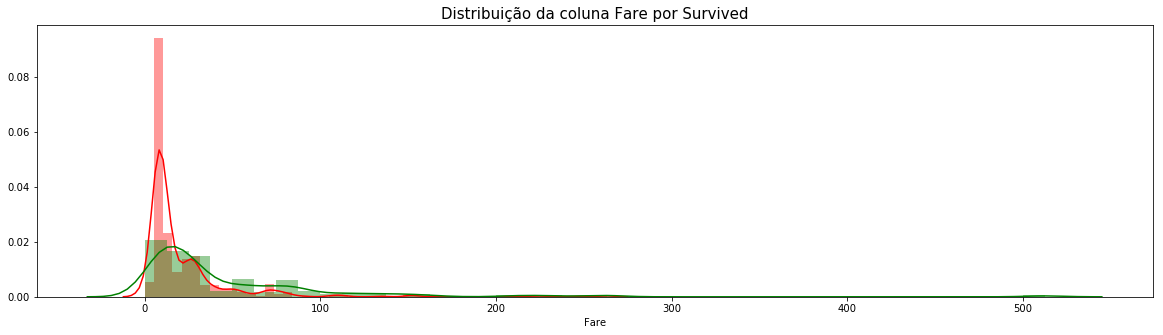

In [175]:
plt.figure(figsize=(20,5))
plt.title('Distribuição da coluna Fare por Survived',size=15)
sns.distplot(train['Fare'].loc[train['Survived']==0] , color="red")
sns.distplot(train['Fare'].loc[train['Survived']==1] , color="green");

Primeiro criar as faixas para as tarifas.

Podemos ver que usando *pd.cut* o resultado fica igual para qualquer que sejam os valores com um intervalo muito grande diferente do que aconteceu quando usamos o *pd.cut* anteriormente em idade (*Age*).

In [176]:
pd.cut(train['Fare'],4)

0      (-0.512, 128.082]
1      (-0.512, 128.082]
2      (-0.512, 128.082]
3      (-0.512, 128.082]
4      (-0.512, 128.082]
             ...        
886    (-0.512, 128.082]
887    (-0.512, 128.082]
888    (-0.512, 128.082]
889    (-0.512, 128.082]
890    (-0.512, 128.082]
Name: Fare, Length: 891, dtype: category
Categories (4, interval[float64]): [(-0.512, 128.082] < (128.082, 256.165] < (256.165, 384.247] < (384.247, 512.329]]

Por esse motivo usaremos o método *pd.qcut*.

Vemos que aqui os intervalos ficaram adequados ao que queremos.

In [177]:
pd.qcut(train['Fare'],4)

0       (-0.001, 7.91]
1      (31.0, 512.329]
2       (7.91, 14.454]
3      (31.0, 512.329]
4       (7.91, 14.454]
            ...       
886     (7.91, 14.454]
887     (14.454, 31.0]
888     (14.454, 31.0]
889     (14.454, 31.0]
890     (-0.001, 7.91]
Name: Fare, Length: 891, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

Vamos criar uma variável chamada *Faixa_Fare*.

In [178]:
train['Faixa_Fare']=pd.qcut(train['Fare'],4)

Note algo interessante aqui: A medida que o valor do *Ticket* vai aumentando para faixas de valores maiores a taxa de também aumenta.

In [179]:
train[['Faixa_Fare','Survived']].groupby(['Faixa_Fare'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Faixa_Fare,Survived
3,"(31.0, 512.329]",0.581081
2,"(14.454, 31.0]",0.454955
1,"(7.91, 14.454]",0.303571
0,"(-0.001, 7.91]",0.197309


Graficamente.

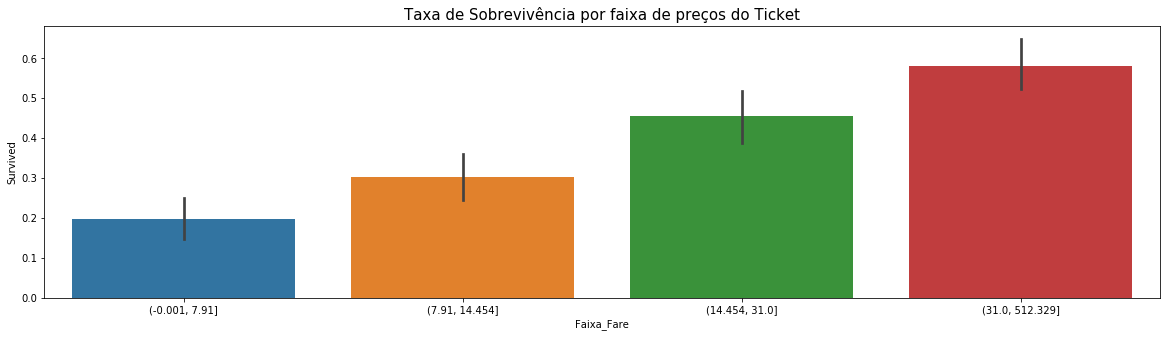

In [180]:
plt.figure(figsize=(20,5))
plt.title('Taxa de Sobrevivência por faixa de preços do Ticket',size=15)
sns.barplot(x="Faixa_Fare", y="Survived", data=train);

Vamos definir novamente quem é treino_teste novamente e Faremos o mesmo que fizemos para *Age*.

In [181]:
treino_teste=[train,test]
for dados in treino_teste:    
    dados.loc[ dados['Fare'] <= 7.91, 'Fare'] = 0
    dados.loc[(dados['Fare'] > 7.91) & (dados['Fare'] <= 14.454), 'Fare'] = 1
    dados.loc[(dados['Fare'] > 14.454) & (dados['Fare'] <= 31), 'Fare'] = 2
    dados.loc[ dados['Fare'] > 31, 'Fare']=3

Transformaremos *Fare* para inteiro.

In [182]:
train['Fare']=train['Fare'].astype(int)

E por fim, excluiremos *Faixa_Fare* de *train* e de *test*.

In [183]:
train=train.drop('Faixa_Fare',axis=1)
test=test.drop('Faixa_age',axis=1)

Vamos visualizar os *datasets*.

Temos agora todas as colunas tratadas e transformadas em categóricas numéricas.

In [184]:
display(train.head())
display(test.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Alone,title
0,0,3,1,1,1,0,0,2,0,0,0
1,1,1,0,2,1,0,3,0,0,0,2
2,1,3,0,1,0,0,1,2,1,1,1
3,1,1,0,2,1,0,3,2,0,0,2
4,0,3,1,2,0,0,1,2,1,1,0


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Alone,title
0,3,1,2,0,0,0.0,1,1,1,0
1,3,0,2,1,0,0.0,2,0,0,2
2,2,1,3,0,0,1.0,1,1,1,0
3,3,1,1,0,0,1.0,2,1,1,0
4,3,0,1,1,1,1.0,2,0,0,2


Ops, faltou imputar o valor faltante em *Fare* de *test* e transformá-la em inteiro.

In [185]:
test['Fare'].fillna(test['Fare'].dropna().mode()[0],inplace=True)
test['Fare']=test['Fare'].astype(int)

## Separando dados de treino e teste

In [186]:
classe=train['Survived']
treino=train.drop('Survived',axis=1)

Dimensão da base das bases.

In [187]:
print(treino.shape, test.shape, classe.shape)

(891, 10) (418, 10) (891,)


## Aplicando os modelos de *Machine Learning*

Aqui os processos para a aplicação dos modelos será: instanciar o modelo, treinar o modelo, gerar as previsões com o modelo e gerar o arquivo no formato *csv* para a submissão na competição. Irei falar do desempenho de cada um dos modelos nessa competição.

Usaremos o modelo *CatBoost Classifier*.

In [93]:
cbt= CatBoostClassifier(iterations=1500, learning_rate=0.01, l2_leaf_reg=3.5, depth=8, rsm=0.98, loss_function= 'Logloss', 
                           eval_metric='AUC',use_best_model=False, random_seed=42)
cbt.fit(treino,classe)
pred = cbt.predict(test)
pred

test2=pd.read_csv('test_tit.csv')
test2['Survived']=pred

test2=test2[['PassengerId','Survived']]
test2.to_csv('gender_submission.csv',index=False)

0:	total: 280ms	remaining: 6m 59s
1:	total: 282ms	remaining: 3m 30s
2:	total: 285ms	remaining: 2m 22s
3:	total: 287ms	remaining: 1m 47s
4:	total: 288ms	remaining: 1m 26s
5:	total: 289ms	remaining: 1m 12s
6:	total: 291ms	remaining: 1m 2s
7:	total: 293ms	remaining: 54.6s
8:	total: 293ms	remaining: 48.6s
9:	total: 294ms	remaining: 43.9s
10:	total: 296ms	remaining: 40s
11:	total: 297ms	remaining: 36.8s
12:	total: 298ms	remaining: 34.1s
13:	total: 300ms	remaining: 31.9s
14:	total: 302ms	remaining: 29.9s
15:	total: 304ms	remaining: 28.2s
16:	total: 306ms	remaining: 26.7s
17:	total: 307ms	remaining: 25.3s
18:	total: 308ms	remaining: 24s
19:	total: 310ms	remaining: 22.9s
20:	total: 311ms	remaining: 21.9s
21:	total: 312ms	remaining: 21s
22:	total: 314ms	remaining: 20.2s
23:	total: 316ms	remaining: 19.4s
24:	total: 318ms	remaining: 18.8s
25:	total: 319ms	remaining: 18.1s
26:	total: 321ms	remaining: 17.5s
27:	total: 322ms	remaining: 16.9s
28:	total: 323ms	remaining: 16.4s
29:	total: 325ms	remaini

290:	total: 736ms	remaining: 3.06s
291:	total: 738ms	remaining: 3.05s
292:	total: 740ms	remaining: 3.05s
293:	total: 742ms	remaining: 3.04s
294:	total: 744ms	remaining: 3.04s
295:	total: 746ms	remaining: 3.03s
296:	total: 747ms	remaining: 3.03s
297:	total: 749ms	remaining: 3.02s
298:	total: 751ms	remaining: 3.02s
299:	total: 754ms	remaining: 3.02s
300:	total: 756ms	remaining: 3.01s
301:	total: 758ms	remaining: 3s
302:	total: 759ms	remaining: 3s
303:	total: 761ms	remaining: 2.99s
304:	total: 763ms	remaining: 2.99s
305:	total: 765ms	remaining: 2.98s
306:	total: 767ms	remaining: 2.98s
307:	total: 769ms	remaining: 2.97s
308:	total: 770ms	remaining: 2.97s
309:	total: 773ms	remaining: 2.97s
310:	total: 775ms	remaining: 2.96s
311:	total: 778ms	remaining: 2.96s
312:	total: 781ms	remaining: 2.96s
313:	total: 785ms	remaining: 2.96s
314:	total: 786ms	remaining: 2.96s
315:	total: 788ms	remaining: 2.95s
316:	total: 791ms	remaining: 2.95s
317:	total: 792ms	remaining: 2.94s
318:	total: 794ms	remainin

569:	total: 1.19s	remaining: 1.94s
570:	total: 1.19s	remaining: 1.94s
571:	total: 1.19s	remaining: 1.93s
572:	total: 1.19s	remaining: 1.93s
573:	total: 1.19s	remaining: 1.93s
574:	total: 1.2s	remaining: 1.92s
575:	total: 1.2s	remaining: 1.92s
576:	total: 1.2s	remaining: 1.92s
577:	total: 1.2s	remaining: 1.91s
578:	total: 1.2s	remaining: 1.91s
579:	total: 1.2s	remaining: 1.91s
580:	total: 1.21s	remaining: 1.91s
581:	total: 1.21s	remaining: 1.9s
582:	total: 1.21s	remaining: 1.9s
583:	total: 1.21s	remaining: 1.9s
584:	total: 1.21s	remaining: 1.89s
585:	total: 1.21s	remaining: 1.89s
586:	total: 1.21s	remaining: 1.89s
587:	total: 1.21s	remaining: 1.88s
588:	total: 1.22s	remaining: 1.88s
589:	total: 1.22s	remaining: 1.88s
590:	total: 1.22s	remaining: 1.88s
591:	total: 1.22s	remaining: 1.87s
592:	total: 1.22s	remaining: 1.87s
593:	total: 1.22s	remaining: 1.87s
594:	total: 1.23s	remaining: 1.86s
595:	total: 1.23s	remaining: 1.86s
596:	total: 1.23s	remaining: 1.86s
597:	total: 1.23s	remaining: 

826:	total: 1.64s	remaining: 1.33s
827:	total: 1.64s	remaining: 1.33s
828:	total: 1.64s	remaining: 1.33s
829:	total: 1.65s	remaining: 1.33s
830:	total: 1.65s	remaining: 1.33s
831:	total: 1.65s	remaining: 1.32s
832:	total: 1.65s	remaining: 1.32s
833:	total: 1.65s	remaining: 1.32s
834:	total: 1.66s	remaining: 1.32s
835:	total: 1.66s	remaining: 1.32s
836:	total: 1.67s	remaining: 1.32s
837:	total: 1.67s	remaining: 1.32s
838:	total: 1.67s	remaining: 1.31s
839:	total: 1.67s	remaining: 1.31s
840:	total: 1.67s	remaining: 1.31s
841:	total: 1.68s	remaining: 1.31s
842:	total: 1.68s	remaining: 1.31s
843:	total: 1.68s	remaining: 1.3s
844:	total: 1.68s	remaining: 1.3s
845:	total: 1.68s	remaining: 1.3s
846:	total: 1.69s	remaining: 1.3s
847:	total: 1.69s	remaining: 1.3s
848:	total: 1.69s	remaining: 1.3s
849:	total: 1.7s	remaining: 1.3s
850:	total: 1.7s	remaining: 1.29s
851:	total: 1.7s	remaining: 1.29s
852:	total: 1.71s	remaining: 1.29s
853:	total: 1.71s	remaining: 1.29s
854:	total: 1.71s	remaining: 1

1137:	total: 2.45s	remaining: 779ms
1138:	total: 2.45s	remaining: 777ms
1139:	total: 2.45s	remaining: 775ms
1140:	total: 2.46s	remaining: 773ms
1141:	total: 2.46s	remaining: 771ms
1142:	total: 2.46s	remaining: 768ms
1143:	total: 2.46s	remaining: 767ms
1144:	total: 2.47s	remaining: 766ms
1145:	total: 2.47s	remaining: 764ms
1146:	total: 2.48s	remaining: 762ms
1147:	total: 2.48s	remaining: 760ms
1148:	total: 2.48s	remaining: 758ms
1149:	total: 2.48s	remaining: 755ms
1150:	total: 2.48s	remaining: 753ms
1151:	total: 2.48s	remaining: 751ms
1152:	total: 2.49s	remaining: 749ms
1153:	total: 2.49s	remaining: 746ms
1154:	total: 2.49s	remaining: 744ms
1155:	total: 2.49s	remaining: 742ms
1156:	total: 2.49s	remaining: 740ms
1157:	total: 2.5s	remaining: 737ms
1158:	total: 2.5s	remaining: 735ms
1159:	total: 2.5s	remaining: 732ms
1160:	total: 2.5s	remaining: 730ms
1161:	total: 2.5s	remaining: 728ms
1162:	total: 2.5s	remaining: 725ms
1163:	total: 2.5s	remaining: 723ms
1164:	total: 2.51s	remaining: 721ms

1391:	total: 2.92s	remaining: 226ms
1392:	total: 2.92s	remaining: 224ms
1393:	total: 2.92s	remaining: 222ms
1394:	total: 2.92s	remaining: 220ms
1395:	total: 2.92s	remaining: 218ms
1396:	total: 2.92s	remaining: 216ms
1397:	total: 2.93s	remaining: 214ms
1398:	total: 2.93s	remaining: 211ms
1399:	total: 2.93s	remaining: 209ms
1400:	total: 2.93s	remaining: 207ms
1401:	total: 2.93s	remaining: 205ms
1402:	total: 2.93s	remaining: 203ms
1403:	total: 2.94s	remaining: 201ms
1404:	total: 2.94s	remaining: 199ms
1405:	total: 2.94s	remaining: 197ms
1406:	total: 2.94s	remaining: 194ms
1407:	total: 2.94s	remaining: 192ms
1408:	total: 2.94s	remaining: 190ms
1409:	total: 2.94s	remaining: 188ms
1410:	total: 2.95s	remaining: 186ms
1411:	total: 2.95s	remaining: 184ms
1412:	total: 2.95s	remaining: 182ms
1413:	total: 2.95s	remaining: 180ms
1414:	total: 2.96s	remaining: 178ms
1415:	total: 2.96s	remaining: 175ms
1416:	total: 2.96s	remaining: 173ms
1417:	total: 2.96s	remaining: 171ms
1418:	total: 2.96s	remaining

Antes eu estava na posição 16963 com um resultado de 0.74162. Não havia aplicado o devido tratamento para as colunas *Age* e *Fare*. Após transformá-las em categóricas numéricas o meu resultado na competição do Titanic foi 0.78468 e subi 11.511 posições e cheguei na posição 5452.

## Processo de seleção de *features* (redução de dimensionalidade)

Para tentar melhorar o desempenho do modelo faremos um redução no número de *features* utilizando o método *Chi2*, que é mais adequado para seleção de *features* para problemas de classificação.

O método chi2 é melhor quando temos features categóricas numéricas e a classe a ser classificada também categórica numérica, que é justamente o nosso caso.

Instanciando e definindo arbitrariamente 4 *features* para serem selecionadas.

In [90]:
chi=SelectKBest(chi2,k=4)

Fazendo o treinamento para seleção de *feautures*.

In [91]:
fit=chi.fit(treino,classe)

Aqui abaixo podemos ver as features que foram escolhidas por esse método: As *features* de índices 0, 1, 5 e 9.


In [92]:
fit.get_support(indices=True)

array([0, 1, 5, 9], dtype=int64)

Vamos imprimir o resultado.

In [93]:
features=fit.transform(treino)
print(features)

[[3 1 0 0]
 [1 0 3 2]
 [3 0 1 1]
 ...
 [3 0 2 1]
 [1 1 2 0]
 [3 1 0 0]]


Vamos ver quais as *features* escolhidas : *Pclass*, *Sex*, *Fare* e *Title*.

In [94]:
cols=fit.get_support(indices=True)
treino.iloc[:,cols]

,Pclass,Sex,Fare,title
0,3,1,0,0
1,1,0,3,2
2,3,0,1,1
3,1,0,3,2
4,3,1,1,0
5,3,1,1,0
6,1,1,3,0
7,3,1,2,3
8,3,0,1,2
9,2,0,2,2


Vamos criar um novo *dataset* apenas com essas variáveis.

In [95]:
treino2=treino[['Pclass','Sex','Fare','title']]
treino2.head()

,Pclass,Sex,Fare,title
0,3,1,0,0
1,1,0,3,2
2,3,0,1,1
3,1,0,3,2
4,3,1,1,0


### Aplicando novamente o Cat Boost ($Chi^{2}$)

Agora aplicaremos novamente ao modelo a nossa nova base de dados e veremos os resultados.

In [96]:
cbt2= CatBoostClassifier(iterations=1500, learning_rate=0.01, l2_leaf_reg=3.5, depth=8, rsm=0.98, loss_function= 'Logloss', 
                           eval_metric='AUC',use_best_model=False, random_seed=42)
cbt2.fit(treino2,classe)
testa2=test[['Pclass','Sex','Fare','title']]

pred2 = cbt2.predict(testa2)
pred2

test2=pd.read_csv('test_tit.csv')
test2['Survived']=pred2
test2=test2[['PassengerId','Survived']]
test2.to_csv('gender_submission.csv',index=False)

0:	total: 2.5ms	remaining: 3.75s
1:	total: 6.75ms	remaining: 5.06s
2:	total: 12.1ms	remaining: 6.02s
3:	total: 14.7ms	remaining: 5.49s
4:	total: 18.1ms	remaining: 5.42s
5:	total: 20.2ms	remaining: 5.04s
6:	total: 23.7ms	remaining: 5.05s
7:	total: 26.6ms	remaining: 4.96s
8:	total: 28.4ms	remaining: 4.71s
9:	total: 30ms	remaining: 4.46s
10:	total: 32.2ms	remaining: 4.35s
11:	total: 33.9ms	remaining: 4.2s
12:	total: 36ms	remaining: 4.12s
13:	total: 37.9ms	remaining: 4.02s
14:	total: 39.6ms	remaining: 3.92s
15:	total: 41.3ms	remaining: 3.83s
16:	total: 42.8ms	remaining: 3.74s
17:	total: 43.9ms	remaining: 3.62s
18:	total: 45.4ms	remaining: 3.54s
19:	total: 46.7ms	remaining: 3.45s
20:	total: 48ms	remaining: 3.38s
21:	total: 49.3ms	remaining: 3.31s
22:	total: 50.2ms	remaining: 3.22s
23:	total: 51.6ms	remaining: 3.17s
24:	total: 53.3ms	remaining: 3.14s
25:	total: 55ms	remaining: 3.12s
26:	total: 57.8ms	remaining: 3.15s
27:	total: 59.2ms	remaining: 3.11s
28:	total: 60.4ms	remaining: 3.06s
29:	t

301:	total: 414ms	remaining: 1.64s
302:	total: 415ms	remaining: 1.64s
303:	total: 417ms	remaining: 1.64s
304:	total: 418ms	remaining: 1.64s
305:	total: 419ms	remaining: 1.64s
306:	total: 421ms	remaining: 1.64s
307:	total: 422ms	remaining: 1.64s
308:	total: 423ms	remaining: 1.63s
309:	total: 424ms	remaining: 1.63s
310:	total: 426ms	remaining: 1.63s
311:	total: 427ms	remaining: 1.63s
312:	total: 428ms	remaining: 1.62s
313:	total: 430ms	remaining: 1.62s
314:	total: 431ms	remaining: 1.62s
315:	total: 432ms	remaining: 1.62s
316:	total: 433ms	remaining: 1.61s
317:	total: 434ms	remaining: 1.61s
318:	total: 435ms	remaining: 1.61s
319:	total: 436ms	remaining: 1.61s
320:	total: 437ms	remaining: 1.6s
321:	total: 438ms	remaining: 1.6s
322:	total: 439ms	remaining: 1.6s
323:	total: 440ms	remaining: 1.6s
324:	total: 442ms	remaining: 1.6s
325:	total: 443ms	remaining: 1.59s
326:	total: 444ms	remaining: 1.59s
327:	total: 444ms	remaining: 1.59s
328:	total: 445ms	remaining: 1.58s
329:	total: 446ms	remaini

543:	total: 712ms	remaining: 1.25s
544:	total: 713ms	remaining: 1.25s
545:	total: 714ms	remaining: 1.25s
546:	total: 715ms	remaining: 1.25s
547:	total: 716ms	remaining: 1.24s
548:	total: 717ms	remaining: 1.24s
549:	total: 717ms	remaining: 1.24s
550:	total: 718ms	remaining: 1.24s
551:	total: 720ms	remaining: 1.24s
552:	total: 720ms	remaining: 1.23s
553:	total: 722ms	remaining: 1.23s
554:	total: 723ms	remaining: 1.23s
555:	total: 724ms	remaining: 1.23s
556:	total: 725ms	remaining: 1.23s
557:	total: 726ms	remaining: 1.22s
558:	total: 726ms	remaining: 1.22s
559:	total: 727ms	remaining: 1.22s
560:	total: 728ms	remaining: 1.22s
561:	total: 729ms	remaining: 1.22s
562:	total: 730ms	remaining: 1.22s
563:	total: 732ms	remaining: 1.21s
564:	total: 733ms	remaining: 1.21s
565:	total: 735ms	remaining: 1.21s
566:	total: 736ms	remaining: 1.21s
567:	total: 738ms	remaining: 1.21s
568:	total: 739ms	remaining: 1.21s
569:	total: 740ms	remaining: 1.21s
570:	total: 741ms	remaining: 1.21s
571:	total: 742ms	re

842:	total: 1.13s	remaining: 882ms
843:	total: 1.13s	remaining: 881ms
844:	total: 1.13s	remaining: 879ms
845:	total: 1.14s	remaining: 877ms
846:	total: 1.14s	remaining: 876ms
847:	total: 1.14s	remaining: 874ms
848:	total: 1.14s	remaining: 872ms
849:	total: 1.14s	remaining: 871ms
850:	total: 1.14s	remaining: 869ms
851:	total: 1.14s	remaining: 867ms
852:	total: 1.14s	remaining: 866ms
853:	total: 1.14s	remaining: 864ms
854:	total: 1.14s	remaining: 863ms
855:	total: 1.14s	remaining: 861ms
856:	total: 1.15s	remaining: 859ms
857:	total: 1.15s	remaining: 858ms
858:	total: 1.15s	remaining: 856ms
859:	total: 1.15s	remaining: 855ms
860:	total: 1.15s	remaining: 853ms
861:	total: 1.15s	remaining: 852ms
862:	total: 1.15s	remaining: 850ms
863:	total: 1.15s	remaining: 849ms
864:	total: 1.15s	remaining: 847ms
865:	total: 1.15s	remaining: 846ms
866:	total: 1.16s	remaining: 845ms
867:	total: 1.16s	remaining: 843ms
868:	total: 1.16s	remaining: 842ms
869:	total: 1.16s	remaining: 841ms
870:	total: 1.16s	re

1142:	total: 1.6s	remaining: 499ms
1143:	total: 1.6s	remaining: 498ms
1144:	total: 1.6s	remaining: 497ms
1145:	total: 1.6s	remaining: 495ms
1146:	total: 1.6s	remaining: 494ms
1147:	total: 1.61s	remaining: 493ms
1148:	total: 1.61s	remaining: 491ms
1149:	total: 1.61s	remaining: 490ms
1150:	total: 1.61s	remaining: 488ms
1151:	total: 1.61s	remaining: 487ms
1152:	total: 1.61s	remaining: 486ms
1153:	total: 1.61s	remaining: 484ms
1154:	total: 1.62s	remaining: 483ms
1155:	total: 1.62s	remaining: 482ms
1156:	total: 1.62s	remaining: 480ms
1157:	total: 1.62s	remaining: 479ms
1158:	total: 1.62s	remaining: 477ms
1159:	total: 1.62s	remaining: 476ms
1160:	total: 1.63s	remaining: 475ms
1161:	total: 1.63s	remaining: 473ms
1162:	total: 1.63s	remaining: 472ms
1163:	total: 1.63s	remaining: 471ms
1164:	total: 1.63s	remaining: 469ms
1165:	total: 1.63s	remaining: 468ms
1166:	total: 1.63s	remaining: 467ms
1167:	total: 1.64s	remaining: 465ms
1168:	total: 1.64s	remaining: 464ms
1169:	total: 1.64s	remaining: 463

1402:	total: 2.07s	remaining: 143ms
1403:	total: 2.07s	remaining: 142ms
1404:	total: 2.07s	remaining: 140ms
1405:	total: 2.08s	remaining: 139ms
1406:	total: 2.08s	remaining: 137ms
1407:	total: 2.08s	remaining: 136ms
1408:	total: 2.08s	remaining: 134ms
1409:	total: 2.08s	remaining: 133ms
1410:	total: 2.08s	remaining: 131ms
1411:	total: 2.08s	remaining: 130ms
1412:	total: 2.09s	remaining: 128ms
1413:	total: 2.09s	remaining: 127ms
1414:	total: 2.09s	remaining: 126ms
1415:	total: 2.09s	remaining: 124ms
1416:	total: 2.09s	remaining: 123ms
1417:	total: 2.09s	remaining: 121ms
1418:	total: 2.09s	remaining: 120ms
1419:	total: 2.1s	remaining: 118ms
1420:	total: 2.1s	remaining: 117ms
1421:	total: 2.1s	remaining: 115ms
1422:	total: 2.1s	remaining: 114ms
1423:	total: 2.1s	remaining: 112ms
1424:	total: 2.1s	remaining: 111ms
1425:	total: 2.11s	remaining: 109ms
1426:	total: 2.11s	remaining: 108ms
1427:	total: 2.11s	remaining: 106ms
1428:	total: 2.11s	remaining: 105ms
1429:	total: 2.11s	remaining: 104m

O modelo foi para 0.79904 e subi 3,442 posições para posição 2010 (no momento da submissão) o que me estar entre no top 11% da competição da *Kaggle*. Ou seja, após o processo de seleção de features o modelo teve uma melhora de desempenho, ao invés de usar 8 *features*, selecionei 4 *features* e o nível de acerto do modelo subiu 1 ponto percentual.

## Testando outros modelos

Vamos testar vários modelos e ver o resultados dos mesmo na competição, tanto com todas as *features* originais como com as selecionadas pelo método $chi²$.

### Modelo de Regressão Logística

In [96]:
tit_LR=LogisticRegression()

tit_LR.fit(treino,classe)
import warnings
warnings.filterwarnings("ignore")

pred3 = tit_LR.predict(test)

test2=pd.read_csv('test_tit.csv')
test2['Survived']=pred3
test2=test2[['PassengerId','Survived']]
test2.to_csv('gender_submission.csv',index=False)

O modelo de Regressão logística deu um resultado de 0.77511 e depois de 0.76555, com as 4 features selecionadas pelo método $chi^2$. Após um recomeço na competição esse modelo teve um desempenho de 0.79186, me levando ao top 8%.

### Modelo *Support Vector Machine*

In [97]:
tit_svm=svm.SVC().fit(treino,classe)
import warnings
warnings.filterwarnings("ignore")

pred4 = tit_LR.predict(test)

test2=pd.read_csv('test_tit.csv')
test2['Survived']=pred4
test2=test2[['PassengerId','Survived']]
test2.to_csv('gender_submission.csv',index=False)

O resultado do SVM foi 0.77511 e depois de 0.76555, com as 4 *features* selecionadas pelo método $chi^2$.

### Modelo *Extra Trees*

In [98]:
tit_etc=ExtraTreesClassifier().fit(treino,classe)
import warnings
warnings.filterwarnings("ignore")

pred5 = tit_etc.predict(test)

test2=pd.read_csv('test_tit.csv')
test2['Survived']=pred5
test2=test2[['PassengerId','Survived']]
test2.to_csv('gender_submission.csv',index=False)

O resultado do Extra Tree foi 0.76555 e depois de 0.79904, com as 4 *features* selecionadas pelo método $chi^2$.

### Modelo *Light Gradient Boosting Machine*

In [99]:
tit_ltb=ltb.LGBMClassifier().fit(treino,classe)

import warnings
warnings.filterwarnings("ignore")

pred6 = tit_ltb.predict(test)

test2=pd.read_csv('test_tit.csv')
test2['Survived']=pred6
test2=test2[['PassengerId','Survived']]
test2.to_csv('gender_submission.csv',index=False)

O resultado do LightGBM foi 0.77033 e depois 0.79425, com as 4 *features* selecionadas pelo método $chi^2$

### Modelo *Extrem Gradient Boosting (XGB)*

In [101]:
xgb_tit = xgb.XGBClassifier().fit(treino,classe)

pred7 = xgb_tit.predict(test)

test2=pd.read_csv('test_tit.csv')
test2['Survived']=pred7
test2=test2[['PassengerId','Survived']]
test2.to_csv('gender_submission.csv',index=False)

O resultado do *XGBoost* 0.77511 e depois de 0.79425, com as 4 *features* selecionadas pelo método $chi^2$.

### Modelo *Random Forest* 

In [102]:
rte_tit= RandomForestClassifier().fit(treino,classe)
pred8 = rte_tit.predict(test)
test2=pd.read_csv('test_tit.csv')
test2['Survived']=pred8
test2=test2[['PassengerId','Survived']]
test2.to_csv('gender_submission.csv',index=False)

O resultado do Random Forest foi 0.76076 e depois 0.79425, com as 4 *features* selecionadas pelo método $chi^2$.

### Modelo de *Gradient Boosting*

In [104]:
gb_tit= GradientBoostingClassifier().fit(treino,classe)
pred9 = gb_tit.predict(test)
test2=pd.read_csv('test_tit.csv')
test2['Survived']=pred9
test2=test2[['PassengerId','Survived']]
test2.to_csv('gender_submission.csv',index=False)

O resultado do *Gradient Boosting* foi 0.75598 e depois 0.79425, com as 4 *features* selecionadas pelo método $chi^2$.

### Modelo *Decision Tree* (Árvore de Decisão)

In [104]:
dt_tit= DecisionTreeClassifier().fit(treino2,classe)
pred10 = dt_tit.predict(testa2)
test2=pd.read_csv('test_tit.csv')
test2['Survived']=pred10
test2=test2[['PassengerId','Survived']]
test2.to_csv('gender_submission.csv',index=False)

O resultado da *Decision tree* 0.76076 e depois 0.79904, com as 4 *features* selecionadas pelo método $chi^2$.

### Modelo *Adaptive Boosting*

In [105]:
ab_tit= AdaBoostClassifier().fit(treino2,classe)
pred11 = ab_tit.predict(testa2)
test2=pd.read_csv('test_tit.csv')
test2['Survived']=pred11
test2=test2[['PassengerId','Survived']]
test2.to_csv('gender_submission.csv',index=False)

O resultado da *AdaBoost* 0.76555 e depois 0.77511, com as 4 features selecionadas pelo método $chi^2$.

### Modelo *K-Nearest Neighbor* (KNN)

In [189]:
knn_tit= KNeighborsClassifier().fit(treino,classe)
pred12 = knn_tit.predict(test)
test2=pd.read_csv('test_tit.csv')
test2['Survived']=pred12
test2=test2[['PassengerId','Survived']]
test2.to_csv('gender_submission.csv',index=False)

O resultado do *KNN* foi 0.74162 e depois 0.76076, com as 4 *features* selecionadas pelo método $chi^2$.

### Modelo *Stochastic Gradient Descent*

In [107]:
sgd_tit= SGDClassifier().fit(treino2,classe)
pred13 = sgd_tit.predict(testa2)
test2=pd.read_csv('test_tit.csv')
test2['Survived']=pred13
test2=test2[['PassengerId','Survived']]
test2.to_csv('gender_submission.csv',index=False)

O resultado do SGD foi 0.77511 e depois 0.76555, com as 4 *features* selecionadas pelo método $chi^2$.

### Modelo de rede neural *Multilayer Perceptron*

In [138]:
mlp_tit= MLPClassifier().fit(treino,classe)
pred14 = mlp_tit.predict(test)
test2=pd.read_csv('test_tit.csv')
test2['Survived']=pred14
test2=test2[['PassengerId','Survived']]
test2.to_csv('gender_submission.csv',index=False)

C:\Users\junio\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


O resultado do MLP foi 0.80382 (com essa rede neural consegui subir 556 posições, chegando na posição 1464 da competição da *Kaggle* e com isso consegui chegar no top 8% dessa competição). Depois com o método $chi^2$ o resultado foi 0.77990.

### Modelo *Passive Aggressive Classifier*

In [109]:
pca_tit= PassiveAggressiveClassifier().fit(treino2,classe)
pred15 = pca_tit.predict(testa2)
test2=pd.read_csv('test_tit.csv')
test2['Survived']=pred15
test2=test2[['PassengerId','Survived']]
test2.to_csv('gender_submission.csv',index=False)

O resultado do *PCA* foi 0.77990 e depois 0.63157, com as 4 *features* selecionadas pelo método $chi^2$.

### Modelo *Relevance Vector Machine*

In [118]:
rvm_tit= EMRVC().fit(treino2,classe)
pred16 = rvm_tit.predict(testa2)
test2=pd.read_csv('test_tit.csv')
test2['Survived']=pred16
test2=test2[['PassengerId','Survived']]
test2.to_csv('gender_submission.csv',index=False)

O resultado do RVM foi 0.78947 e depois 0.78468, com as 4 *features* selecionadas pelo método $chi^2$.

### Modelo *Naive Bayes* Gaussiano

In [119]:
gnb_tit= GaussianNB().fit(treino2,classe)
pred17 = gnb_tit.predict(testa2)
test2=pd.read_csv('test_tit.csv')
test2['Survived']=pred17
test2=test2[['PassengerId','Survived']]
test2.to_csv('gender_submission.csv',index=False)

O resultado do *Nayve Bayes Gaussian* foi 0.74641 e depois 0.75598, com as 4 *features* selecionadas pelo método $chi^2$.

### Modelo *Naive Bayes Bernoulli*

In [122]:
bnb_tit= BernoulliNB().fit(treino2,classe)
pred18 = bnb_tit.predict(testa2)
test2=pd.read_csv('test_tit.csv')
test2['Survived']=pred18
test2=test2[['PassengerId','Survived']]
test2.to_csv('gender_submission.csv',index=False)

O resultado do *Naive Bayes Bernoulli* foi 0.76076 e depois 0.75598, com as 4 *features* selecionadas pelo método $chi^2$.

### Modelo *Naive Bayes Complement*

In [124]:
cnb_tit= ComplementNB().fit(treino2,classe)
pred19 = cnb_tit.predict(testa2)
test2=pd.read_csv('test_tit.csv')
test2['Survived']=pred19
test2=test2[['PassengerId','Survived']]
test2.to_csv('gender_submission.csv',index=False)

O resultado do *Naive Bayes Complement* foi 0.73205 e depois 0.75598, com as 4 *features* selecionadas pelo método $chi^2$.

### Modelo *Naive Bayes Multinomial*

In [126]:
mnb_tit= MultinomialNB().fit(treino2,classe)
pred21 = mnb_tit.predict(testa2)
test2=pd.read_csv('test_tit.csv')
test2['Survived']=pred21
test2=test2[['PassengerId','Survived']]
test2.to_csv('gender_submission.csv',index=False)

O resultado do *Naive Bayes Multinomial* foi 0.74162 e depois foi 0.76076, com as 4 *features* selecionadas pelo método $chi^2$.

### Modelo Processo Gaussiano

In [127]:
gpc_tit= GaussianProcessClassifier().fit(treino2,classe)
pred22 = gpc_tit.predict(testa2)
test2=pd.read_csv('test_tit.csv')
test2['Survived']=pred22
test2=test2[['PassengerId','Survived']]
test2.to_csv('gender_submission.csv',index=False)

O resultado do *Gaussian Process* foi 0.74641 e depois 0.78468, com as 4 *features* selecionadas pelo método $chi^2$.

### Modelo *Perceptron*

In [129]:
percep_tit= Perceptron().fit(treino2,classe)
pred23 = percep_tit.predict(testa2)
test2=pd.read_csv('test_tit.csv')
test2['Survived']=pred23
test2=test2[['PassengerId','Survived']]
test2.to_csv('gender_submission.csv',index=False)

O resultado do Perceptron foi 0.74162 e depois 0.77511, com as 4 *features* selecionadas pelo método $chi^2$.

## Tabela comparativa dos modelos

Como podemos observar, na tabela, abaixo o modelo de melhor desempenho nessa competição foi a rede neural Multi-layer Perceptron classifier, que teve um acerto das previsões de 80.382%; e como já dito fez com que eu chegasse ao top 8% da competição.


|                                 ||   Score     ||   $chi^{2}$  ||   O modelo melhorou ?  ||
|:-------------------------------:||:-----------:||:------------:||:----------------------:||
|**MLP Classifier**               || **80.382**  ||  77.990      ||       Não       ||
|EMRVC                            || 78.947      ||  78.468      ||       Não       ||
|CatBoost Classifier             || 78.468      ||  79.904      ||       Sim       ||
|Passive Aggressive Classifier    || 77.990      ||  63.157      ||       Não       ||
|XGBoost Classifier               || 77.511      ||  79.425      ||       Sim       ||
|Logistic Regression              || 77.511      ||  76.555      ||       Não       ||
|SVM                              || 77.511      ||  76.555      ||       Não       ||
|SGD Classifier                   || 77.511      ||  76.555      ||       Não       ||
|LGBM Classifier                  || 77.033      ||  79.425      ||       Sim       ||
|Extra Trees Classifier           || 76.555      ||  79.904      ||       Sim       ||
|AdaBoost Classifier              || 76.555      ||  77.511      ||       Sim       ||
|Random Forest                    || 76.076      ||  79.425      ||       Sim       ||
|Decision Tree Classifier         || 76.076      ||  77.904      ||       Sim       ||
|Bernoulli NB                     || 76.076      ||  75.598      ||       Não       ||
|Gradient Boosting Classifier     || 75.598      ||  79.425      ||       Sim       ||
|Gaussian Process Classifier      || 74.641      ||  78.468      ||       Sim       ||
|Gaussian NB                      || 74.641      ||  75.598      ||       Sim       ||
|Perceptron                       || 74.162      ||  77.511      ||       Sim       ||
|KNN                              || 74.162      ||  76.076      ||       Sim       ||
|Multinomial NB                   || 74.162      ||  76.076      ||       Sim       ||
|Complement NB                    || 73.205      ||  75.598      ||       Sim       ||

Podemos ver na tabela acima, que em 14 dos 21 modelos utilizados, o método $Chi^{2}$ proporcionou um melhora do desempenho do modelo.